In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
DEMO_URL = 'http://ctgan-data.s3.amazonaws.com/census.csv.gz'
df = pd.read_csv(DEMO_URL, compression='gzip')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'income',
    'native-country'
]

In [7]:
all_cols = [x for x in df.columns if x not in discrete_columns] + discrete_columns

In [27]:
def plot_hist(data, cols, num_bins=25, n_cols=2, size=(20, 30)):
    sns.set(style="darkgrid")
    idxs = list(data.keys())
    n_rows = int(np.ceil(len(cols) / n_cols))
    fig = plt.figure(figsize=size, constrained_layout=True)
    grid = gridspec.GridSpec(nrows=n_rows, ncols=n_cols, figure=fig)
    
    i = 0
    for c in cols:
        if i == len(cols) - 1:
            ax = fig.add_subplot(grid[i//n_cols, i%n_cols:n_cols])
        else:
            ax = fig.add_subplot(grid[i//n_cols, i%n_cols])
        ax.set_title(c, fontsize=16)
        if data[idxs[0]][c].dtype == 'O':
            val_counts = pd.concat([data[i][c].value_counts() for i in idxs], axis=1)
            val_counts.columns = idxs
            val_counts.plot(kind='bar', ax=ax)
            ax.tick_params(axis='y', labelsize=14)
            ax.tick_params(axis='x', labelrotation=50, labelsize=14, labelright=True)
        else:
            ax.hist([data[i][c] for i in idxs],
                         label=idxs, 
                         bins=np.linspace(
                             np.percentile(data[idxs[0]][c],0.1),
                             np.percentile(data[idxs[0]][c],99.9), 
                             num_bins)
                         )
            ax.tick_params(axis='y', labelsize=14)
            ax.tick_params(axis='x', labelsize=14, labelleft=True)
            ax.legend()
        i += 1

In [28]:
df_torch = pd.read_csv('torch.csv')
df_tf = pd.read_csv('tensorflow.csv')

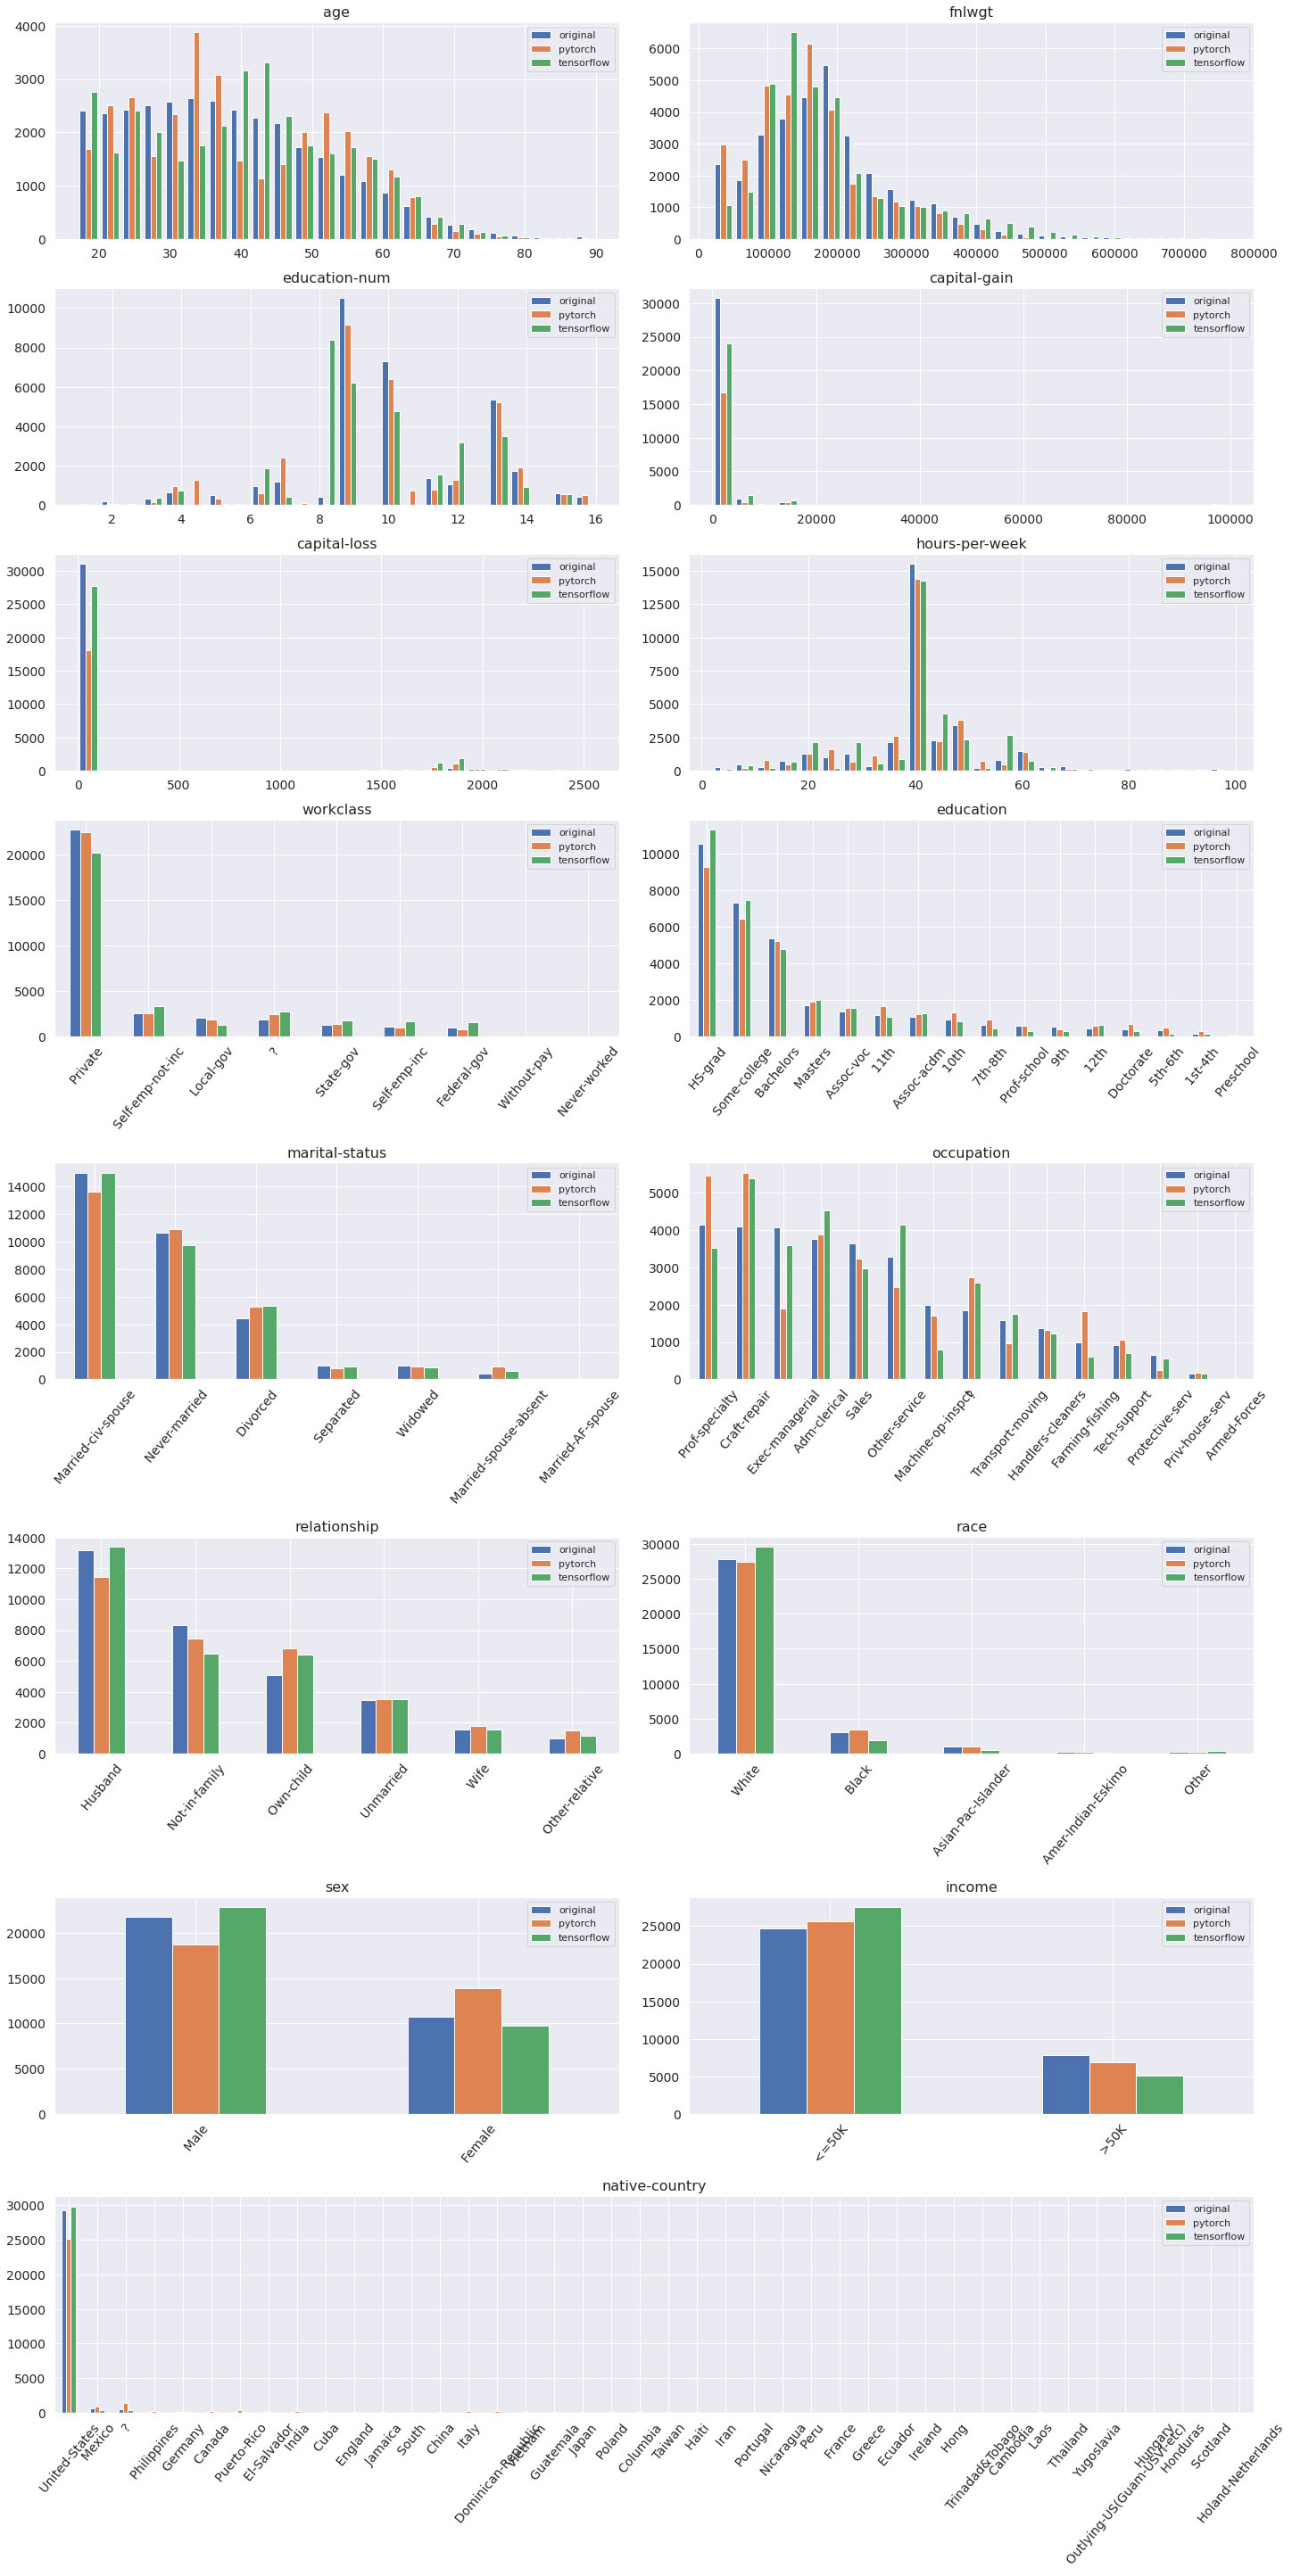

In [29]:
data = {'original': df, 'pytorch': df_torch, 'tensorflow': df_tf}
plot_hist(data, all_cols, size=(20, 40))